## Downloading Dataset

In [2]:
 ! pip install -q kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d kazanova/sentiment140

 89% 72.0M/80.9M [00:00<00:00, 112MB/s] 
100% 80.9M/80.9M [00:00<00:00, 97.8MB/s]


In [7]:
! unzip /content/sentiment140.zip

Archive:  /content/sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


## Import dependencies

In [8]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import re
import string
import seaborn as sns
from sklearn.model_selection import train_test_split

## Data Loading

In [9]:
df = pd.read_csv("/content/training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1")

In [10]:

df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [11]:
df = df.iloc[:,[0,1,5]]

In [12]:
df

,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,is upset that he can't update his Facebook by ...
1,0,1467810917,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,my whole body feels itchy and like its on fire
3,0,1467811193,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,@Kwesidei not the whole crew
...,...,...,...
1599994,4,2193601966,Just woke up. Having no school is the best fee...
1599995,4,2193601969,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Happy 38th Birthday to my boo of alll time!!! ...


In [13]:
df.shape

(1599999, 3)

In [14]:
df.columns

Index(['0', '1467810369',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [15]:
df = df.rename({"0":"target", "1467810369":"id", "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D":"tweets"}, axis=1)
df

,target,id,tweets
0,0,1467810672,is upset that he can't update his Facebook by ...
1,0,1467810917,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,my whole body feels itchy and like its on fire
3,0,1467811193,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,@Kwesidei not the whole crew
...,...,...,...
1599994,4,2193601966,Just woke up. Having no school is the best fee...
1599995,4,2193601969,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Happy 38th Birthday to my boo of alll time!!! ...


In [16]:
df['target'].value_counts()

4    800000
0    799999
Name: target, dtype: int64

In [17]:
train, test = train_test_split(df, test_size = 0.2, random_state = 0, stratify=df["target"])

In [18]:
print(train.shape)
print(test.shape)

(1279999, 3)
(320000, 3)


## Data Cleaning and preprosessing

In [19]:
train['target'].value_counts()

4    640000
0    639999
Name: target, dtype: int64

In [20]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## removing username ie.. @user

In [21]:
train["tweets"]= train["tweets"].apply(lambda x: re.sub("^@[/w]*", "", x))
test["tweets"]= test["tweets"].apply(lambda x: re.sub("^@[/w]*", "", x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## tokenizing

In [22]:
train["tweets"] =train["tweets"].apply(word_tokenize)
test["tweets"] =test["tweets"].apply(word_tokenize)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
train

,target,id,tweets
675143,0,2248006844,"[My, hair, got, wet, after, iHad, it, PERFECTL..."
1489851,4,2068764430,"[Demi, Lovato, 's, new, music, video, audition..."
1382437,4,2052466373,"[mitchelmusso, I, wish, I, could, have, gone, ..."
852475,4,1572981443,"[ummm, ..., my, API, is, 0, so, yall, give, me..."
196472,0,1970725994,"[sprained, her, ankle, from, cobra, starship]"
...,...,...,...
343350,0,2015443314,"[Nsw, aint, winning, footy, but, theres, still..."
92845,0,1760241677,"[annoyed, i, lost, my, phone]"
1044706,4,1957468913,"[patriciaco, ..., You, 're, rally, so, mean, .]"
824379,4,1556218798,"[anthonylewry, sex, and, the, city]"


## removing stopwords

In [24]:
stop_word = set(stopwords.words('english'))

In [25]:
def removeStopword(tweets):
    sentence = []
    for tweet in tweets:
        if tweet not in stop_word:
            sentence.append(tweet)

    return sentence

In [26]:
train["tweets"]= train["tweets"].apply(removeStopword)
test["tweets"] = test["tweets"].apply(removeStopword)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
train

,target,id,tweets
675143,0,2248006844,"[My, hair, got, wet, iHad, PERFECTLY, flat, ir..."
1489851,4,2068764430,"[Demi, Lovato, 's, new, music, video, audition..."
1382437,4,2052466373,"[mitchelmusso, I, wish, I, could, gone, !, I, ..."
852475,4,1572981443,"[ummm, ..., API, 0, yall, give, sec, refresh]"
196472,0,1970725994,"[sprained, ankle, cobra, starship]"
...,...,...,...
343350,0,2015443314,"[Nsw, aint, winning, footy, theres, still, hop..."
92845,0,1760241677,"[annoyed, lost, phone]"
1044706,4,1957468913,"[patriciaco, ..., You, 're, rally, mean, .]"
824379,4,1556218798,"[anthonylewry, sex, city]"


## stemming

In [28]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
train['tweets'] = train['tweets'].apply(lambda x: [stemmer.stem(i) for i in x])
test['tweets'] = test['tweets'].apply(lambda x: [stemmer.stem(i) for i in x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [29]:
train

,target,id,tweets
675143,0,2248006844,"[My, hair, got, wet, ihad, perfectli, flat, ir..."
1489851,4,2068764430,"[demi, lovato, 's, new, music, video, audit, t..."
1382437,4,2052466373,"[mitchelmusso, I, wish, I, could, gone, !, I, ..."
852475,4,1572981443,"[ummm, ..., api, 0, yall, give, sec, refresh]"
196472,0,1970725994,"[sprain, ankl, cobra, starship]"
...,...,...,...
343350,0,2015443314,"[nsw, aint, win, footi, there, still, hope, il..."
92845,0,1760241677,"[annoy, lost, phone]"
1044706,4,1957468913,"[patriciaco, ..., you, 're, ralli, mean, .]"
824379,4,1556218798,"[anthonylewri, sex, citi]"


In [30]:
combi = train.append(test, ignore_index = True)

In [31]:
combi["clean"]= combi["tweets"].apply(lambda x:" ".join(i for i in x))

# Data Visualization

In [32]:
words = ""
for i in combi["clean"]:
    words = words+ i

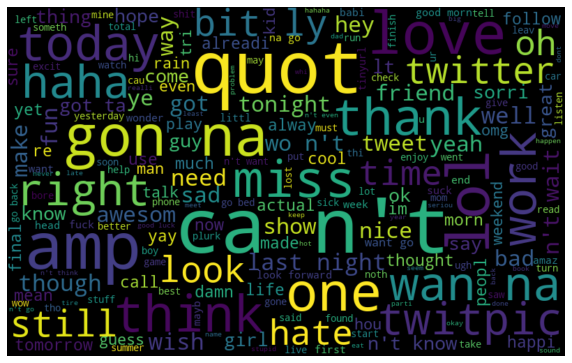

In [33]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

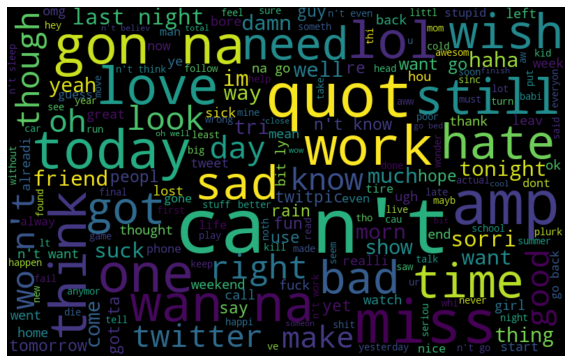

In [34]:
negative = combi[combi['target']==0]
words = " "
for i in negative["clean"]:
    words = words+ i

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

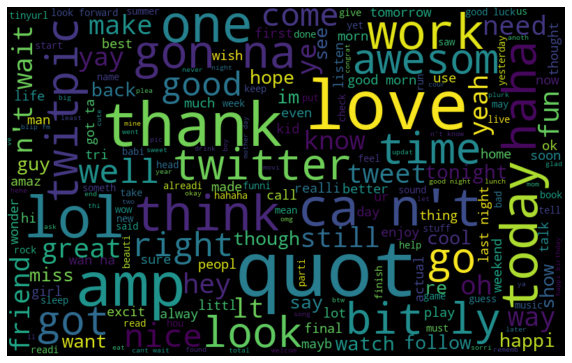

In [35]:
positive = combi[combi['target']==4]
words = ""
for i in positive["clean"]:
    words = words+ i
    
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Feature Extracting

## Bag of Words

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['clean'])

## Tfidf Feature Extraction

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['clean'])

In [38]:
train["target"] = train["target"].apply(lambda x: 1 if x==4 else 0)
test["target"] = test["target"].apply(lambda x: 1 if x==4 else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Model Building

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:1279999,:]
test_bow = bow[1279999:,:]
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train["target"], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.7562493161313426

## Test f1 score

In [40]:
def predict_f1(X, y, model):
    pred = model.predict_proba(X)
    pred_int = pred[:,1]>=0.5
    pred_int = pred_int.astype(np.int)
    return f1_score(y, pred_int)

In [41]:
predict_f1(test_bow, test["target"].to_numpy(), lreg)

0.7571531452921472

In [42]:
train_tfidf = tfidf[:1279999,:]
test_tfidf = tfidf[1279999:,:]
xtrain_tfidf, xvalid_tfidf, ytrain_tfidf, yvalid_tfidf = train_test_split(train_tfidf, train["target"], random_state=42, test_size=0.3)


lreg = LogisticRegression()
lreg.fit(xtrain_tfidf, ytrain_tfidf)
predict_f1(xvalid_tfidf, yvalid_tfidf, lreg)

0.7538075078609447

In [43]:
predict_f1(test_tfidf, test["target"].to_numpy(), lreg)

0.7546543756560768